In [11]:
import sys
sys.path.insert(0,'..')
import src.preprocess as preprocess
import src.store_results as store_results
import src.plot as plot
import src.peak_area as peak_area
import src.analysis as analysis
import src.live_dev as live_dev
from datetime import datetime
import time
import warnings
import pandas as pd
warnings.filterwarnings("ignore")


# Input Data

In [7]:
source_1 = r"/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/source_live_data/test"
destination_1 = r"/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/live_data"
start_date_time_1 = datetime(2021, 6, 14, 0, 0, 0, 0)


# Create bagdata instance for preprocessing task

In [8]:
bagdata_1 = preprocess.Bag_data(source_1, destination_1, start_date_time_1)

In [9]:
infor= bagdata_1.information

In [12]:
infor_df = pd.read_csv(infor)
infor_df

,DateTime,Source_Path,TimeGap
0,2021-06-14 15:09:40.055,/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/s...,0
1,2021-06-14 15:19:39.737,/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/s...,599
2,2021-06-14 15:29:39.195,/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/s...,1199
3,2021-06-14 15:39:38.419,/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/s...,1798
4,2021-06-14 15:49:37.956,/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/s...,2397
5,2021-06-14 15:59:37.478,/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/s...,2997
6,2021-06-14 16:11:47.374,/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/s...,3727
7,2021-06-14 16:21:47.630,/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/s...,4327
8,2021-06-14 16:31:47.184,/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/s...,4927
9,2021-06-14 16:41:46.670,/Users/nguyenminhhieu/Documents/Job/HIWI_JOB/s...,5526


# Create instance for storing results task

In [13]:
bagresult_1 = store_results.Bag_result(bagdata=bagdata_1, nameoption='_1')
#bagresult_1.save()

## load existed  bagresult 

In [ ]:
bagresult_1 = store_results.load_bagresult(destination_folder=destination_1, bagresult_name= 'bag_result_1')

# Plot 2d and 3d

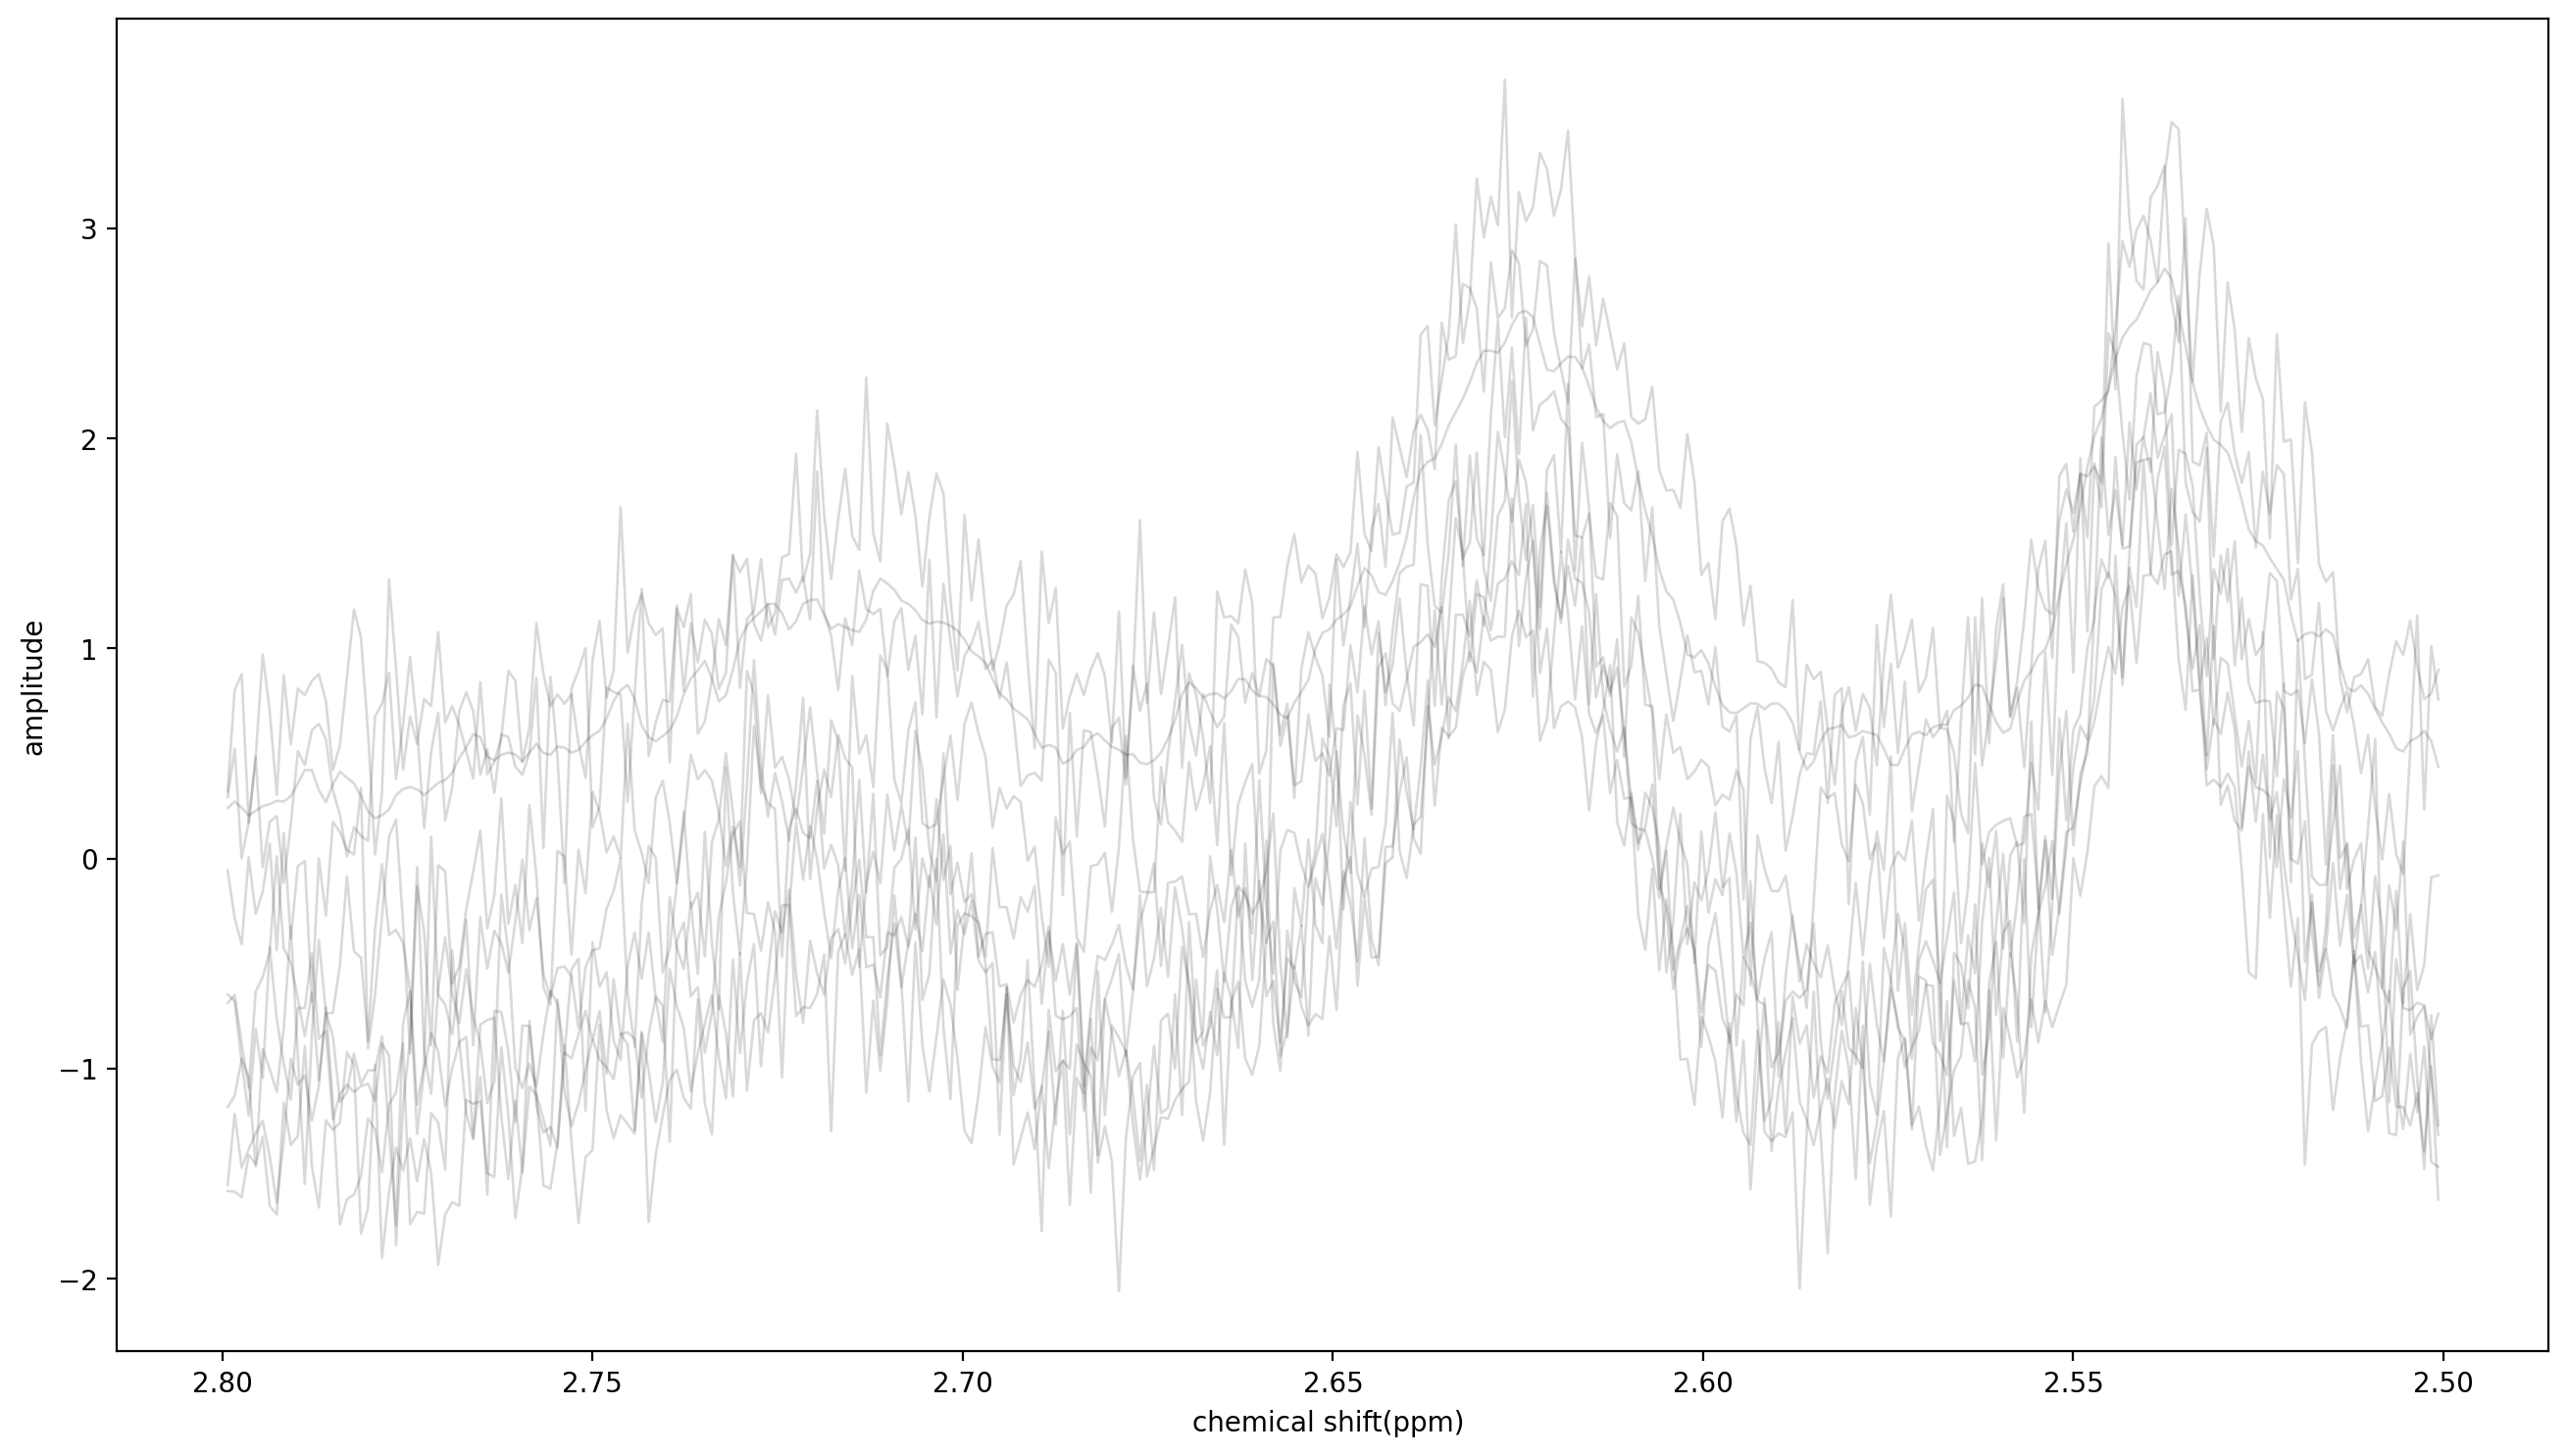

In [14]:
#2d plot
_2d = plot.plot_2d(bag_result=  bagresult_1, 
                   timestr= 1, timeend= 5, 
                   ppmstr= 2.5, ppmend= 2.8)

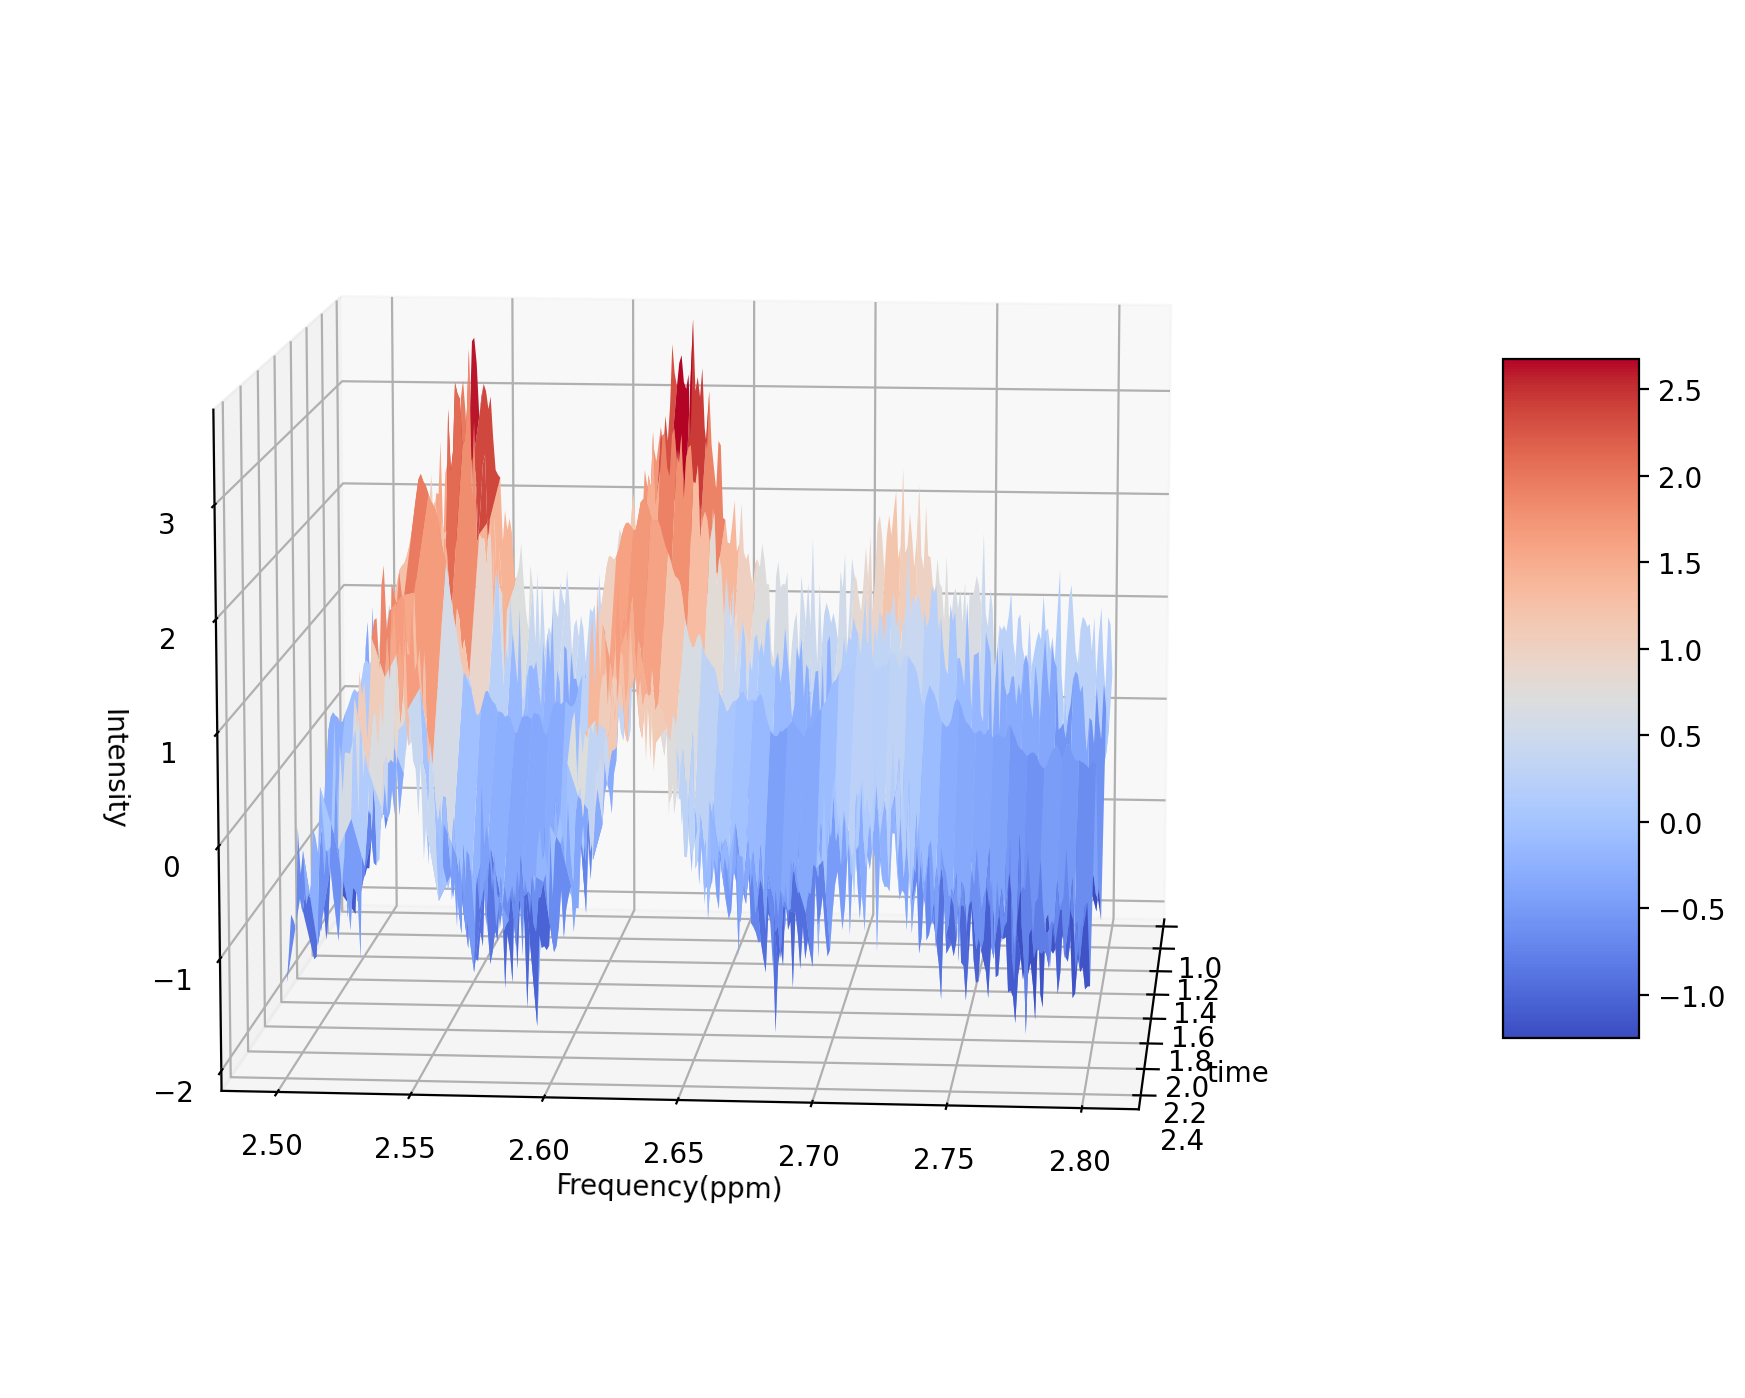

In [15]:
#3d
_3D = plot.plot_3D(bag_result=  bagresult_1,
                   timestr= 1, timeend= 5, 
                   ppmstr= 2.5, ppmend= 2.8, 
                   view_op1=10, view_op2=5)

# Peak area compute

In [16]:
keton = peak_area.Chemical_shift(name= 'keton',
                                 nr_proton= 6,
                                 ppmstr= 2.5,
                                 ppmend=2.8)
                                
alcohol = peak_area.Chemical_shift(name='alcohol',
                                   nr_proton= 3,
                                   ppmstr= 1,
                                   ppmend=2)

tmsp = peak_area.Chemical_shift(name='tmsp',
                                nr_proton= 9,
                                ppmstr=1,
                                ppmend=3)

In [18]:
baganalysis_1 = analysis.Bag_analysis(sty_const= 0.9,
                                     c0_tmsp= 0.5,
                                     bagresult= bagresult_1,
                                     tmsp = tmsp,
                                     chemicals = [ keton,
                                                  alcohol ],
                                    nameoption= "_1")   

In [19]:
baganalysis_1.analysis_df

,Time,tmsp,keton,alcohol,tmsp_per_proton,keton_per_proton,alcohol_per_proton,keton_concentration,alcohol_concentration,keton_sty,alcohol_sty
0,0.0,18.906018,5.494514,0.060627,2.100669,0.915752,0.020209,0.217967,0.004810,0.196170,0.004329
1,599.0,22.876290,6.148935,1.988339,2.541810,1.024823,0.662780,0.201593,0.130376,0.181434,0.117338
2,1199.0,22.971907,6.050580,2.010976,2.552434,1.008430,0.670325,0.197543,0.131311,0.177789,0.118180
3,1798.0,23.251625,6.158666,2.328019,2.583514,1.026444,0.776006,0.198653,0.150184,0.178787,0.135166
4,2397.0,22.917015,4.011479,9.246294,2.546335,0.668580,3.082098,0.131283,0.605203,0.118154,0.544683
5,2997.0,23.308091,3.105263,12.105787,2.589788,0.517544,4.035262,0.099920,0.779072,0.089928,0.701165
6,3727.0,28.335166,4.170663,14.318930,3.148352,0.695110,4.772977,0.110393,0.758012,0.099353,0.682211
7,4327.0,13.532337,1.431191,8.007957,1.503593,0.238532,2.669319,0.079321,0.887647,0.071389,0.798882
8,4927.0,23.325956,3.171895,12.280395,2.591773,0.528649,4.093465,0.101986,0.789704,0.091787,0.710733
9,5526.0,1.202853,1.513556,2.002701,0.133650,0.252259,0.667567,0.943729,2.497439,0.849356,2.247695
